In [4]:
from matplotlib import pyplot as plt
%matplotlib notebook
# calling it a second time may prevent some graphics errors
%matplotlib notebook

#For printing out all cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np

Input values

In [99]:
EndTime = 100    # days
NrIter = 100
beta = 0.5  # Probability to get infected * times people meet
gamma = 0.1  # Vaccination rate
alpha = 0.1  # Recovery rate
tStart=0
N = 1  # population in biblions
I0=N*0.01
S0=N-I0

In [111]:
h = EndTime/NrIter      #stepsize
time=np.linspace(0,EndTime+1,NrIter+1)

In [62]:
I=[0]*NrIter
I=np.append(I0,I)
S=[0]*NrIter
S=np.append(S0,S)
#time=[0]*NrIter
#time=np.append(tStart,time)

In [112]:
len(time)

101

In [64]:
# def SChange(I,S,*args):
#     Change=alpha*I-beta*S*I/N
#     return(Change)

# def IChange(I,S,*args):
#     Change=-alpha*I+beta*S*I/N
#     return(Change)


In [130]:
def SChange(Vari,*args):  #Vari[0] - S, Vari[1] - I
    Change=alpha*Vari[1]-beta*Vari[0]*Vari[1]/N
    return(Change)

def IChange(Vari,*args):
    Change=-alpha*Vari[1]+beta*Vari[0]*Vari[1]/N
    return(Change)

ChangeList=[SChange,IChange]  #List of all functions

In [131]:
Var=np.array([S,I])

In [128]:
#Vari=np.array([S[0],I[0]])
# #([Kii * h for Kii in K1])
# #np.multiply(K1,h)
# Var[:,0]

In [127]:
# i=0
# Vari=Var[:,i]
# time[i+1]=time[i]+h


# for i,func in enumerate(ChangeList):
#     K1[i]=func(Vari)

# for i,func in enumerate(ChangeList):
#     K2[i]=func(Vari+h*K1)

# for i,func in enumerate(ChangeList):
#     K3[i]=func(Vari+h*K2)

# for i,func in enumerate(ChangeList):
#     K4[i]=func(Vari+h*K3)

In [129]:
# Var[:,1]=Var[:,i] + K1/6+K2/3 + K3/3 + K4/6
# Var[:,1]

In [117]:


def MyRungeKutta(i,*args): #i=time
    #global S, I
    Vari=Var[:,i]
    #time[i+1]=time[i]+h

    for j,func in enumerate(ChangeList):
        K1[j]=func(Vari)
    
    for j,func in enumerate(ChangeList):
        K2[j]=func(Vari+h*K1)
        
    for j,func in enumerate(ChangeList):
        K3[j]=func(Vari+h*K2)
        
    for j,func in enumerate(ChangeList):
        K4[j]=func(Vari+h*K3)

#     #Infected
#     k1_I=h*IChange(Ii,Si)
#     k2_I=h*IChange(Ii+k1_I/2,Si)
#     k3_I=h*IChange(Ii+k2_I/2,Si)
#     k4_I=h*IChange(Ii+k3_I,Si)
    
#     #Susceptable
#     k1_S=h*SChange(Ii,Si)
#     k2_S=h*SChange(Ii,Si+k1_S/2)
#     k3_S=h*SChange(Ii,Si+k2_S/2)
#     k4_S=h*SChange(Ii,Si+k3_S)
    Var[:,i+1]=Var[:,i] + K1/6+K2/3 + K3/3 + K4/6
#     S[i+1]=Si+k1_S/6+k2_S/3+k3_S/3+k4_S/6
#     I[i+1]=Ii+k1_I/6+k2_I/3+k3_I/3+k4_I/6

In [125]:
def Euler(i,*args):
    Vari=Var[:,i]
    #time[i+1]=time[i]+h
    for j,func in enumerate(ChangeList):
        Var[j,i+1]=Var[j,i]+h*func(Vari)

In [124]:
# def Euler(i,*args):
#     Si=S[i]
#     Ii=I[i]
#     S[i+1]=Si+h*SChange(Ii,Si)
#     I[i+1]=Ii+h*IChange(Ii,Si)
    
#     time[i+1]=time[i]+h

In [118]:
for i in range(NrIter):
    MyRungeKutta(i)

<IPython.core.display.Javascript object>


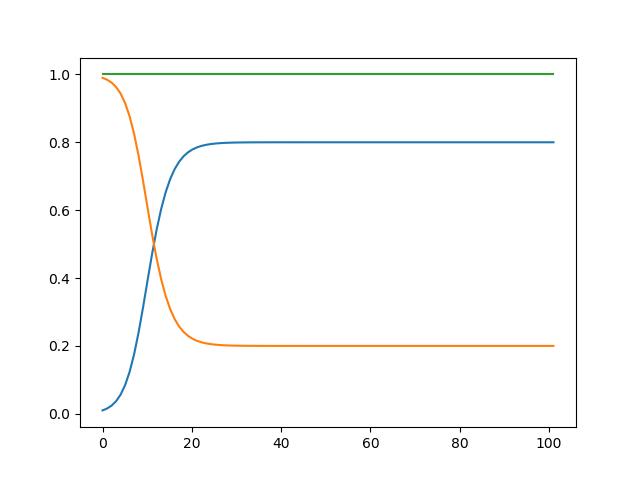

In [119]:
fig, ax=plt.subplots()
ax.plot(time,Var[1])
ax.plot(time,Var[0])
ax.plot(time,Var[1]+Var[0])
#plt.plot(I)

<IPython.core.display.Javascript object>


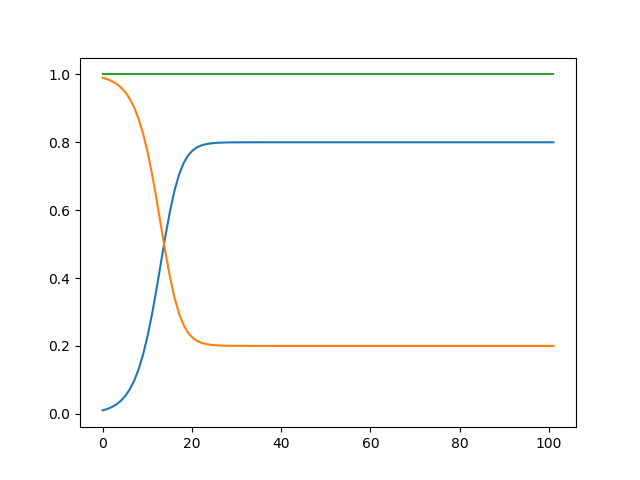

In [126]:
for i in range(NrIter):
    Euler(i)

fig, ax=plt.subplots()
ax.plot(time,Var[1])
ax.plot(time,Var[0])
ax.plot(time,Var[1]+Var[0])
#plt.plot(I)

In [ ]:
1-alpha/beta
I[-1]/N